In [1]:
import pandas as pd
import datetime
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [2]:
control_data = pd.read_csv("control_group.csv", sep = ";")
test_data = pd.read_csv("test_group.csv", sep = ";")

In [3]:
control_data

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [4]:
test_data

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [5]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

# Checking for NULL values

In [6]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [7]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

# Handling NULL values

In [8]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), 
                                             inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(), 
                             inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), 
                                      inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), 
                                         inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), 
                                      inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), 
                                     inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), 
                                 inplace=True)

# EDA 

In [10]:
ab_data = control_data.merge(test_data, 
                             how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
ab_data.head()

D:\Subhrajit\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [11]:
print(ab_data["Campaign Name"].value_counts())

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64


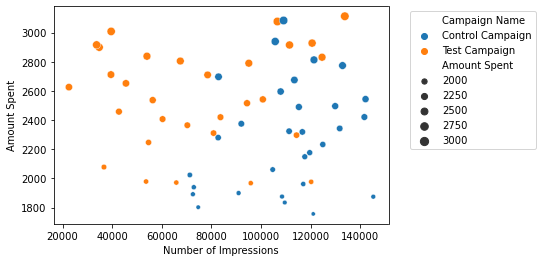

In [19]:
figure = sns.scatterplot(data = ab_data, 
                    x="Number of Impressions",
                    y="Amount Spent", 
                    size="Amount Spent", 
                    hue= "Campaign Name"
                    )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
The control campaign resulted in more impressions according to the amount spent on both campaigns.

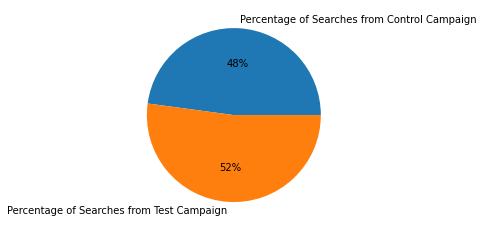

In [31]:
label = ["Percentage of Searches from Control Campaign", 
         "Percentage of Searches from Test Campaign"]
counts = [sum(control_data["Searches Received"]), 
          sum(test_data["Searches Received"])]
colors = ['gold','lightgreen']

plt.pie(data=ab_data,labels=label,x=counts,autopct='%.0f%%')
plt.show()

The test campaign resulted in more searches on the website

In [32]:
label = ["Website Clicks from Control Campaign", 
         "Website Clicks from Test Campaign"]
counts = [sum(control_data["Website Clicks"]), 
          sum(test_data["Website Clicks"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Website Clicks')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The test campaign wins in the number of website clicks

In [33]:
label = ["Content Viewed from Control Campaign", 
         "Content Viewed from Test Campaign"]
counts = [sum(control_data["Content Viewed"]), 
          sum(test_data["Content Viewed"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Content Viewed')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The audience of the control campaign viewed more content than the test campaign.

In [34]:
label = ["Products Added to Cart from Control Campaign", 
         "Products Added to Cart from Test Campaign"]
counts = [sum(control_data["Added to Cart"]), 
          sum(test_data["Added to Cart"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Added to Cart')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Despite low website clicks more products were added to the cart from the control campaign

In [35]:
label = ["Amount Spent in Control Campaign", 
         "Amount Spent in Test Campaign"]
counts = [sum(control_data["Amount Spent"]), 
          sum(test_data["Amount Spent"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Amount Spent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

The amount spent on the test campaign is higher than the control campaign. But as we can see that the control campaign resulted in more content views and more products in the cart, the control campaign is more efficient than the test campaign.

In [36]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
counts = [sum(control_data["Purchases"]), 
          sum(test_data["Purchases"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Purchases')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

There’s only a difference of around 1% in the purchases made from both ad campaigns

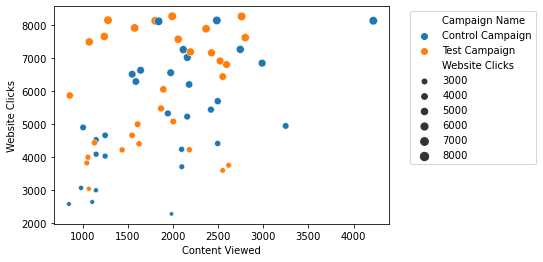

In [38]:
figure = sns.scatterplot(data = ab_data, 
                    x="Content Viewed",
                    y="Website Clicks", 
                    size="Website Clicks", 
                    hue= "Campaign Name"
                    )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()




The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign wins!

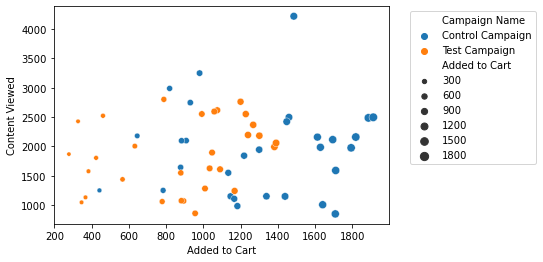

In [39]:
figure = sns.scatterplot(data = ab_data, 
                    x="Added to Cart",
                    y="Content Viewed", 
                    size="Added to Cart", 
                    hue= "Campaign Name"
                    )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Control campaign have more items added to cart as well as content viewed

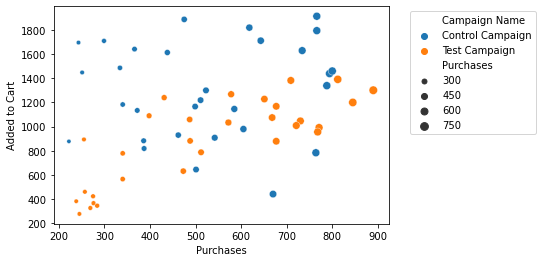

In [41]:
figure = sns.scatterplot(data = ab_data, 
                    x="Purchases",
                    y="Added to Cart", 
                    size="Purchases",
                    hue= "Campaign Name"
                    )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()



Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.